In [1]:
#Task 4 - SPAM SMS DETECTION

In [8]:
# importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)


In [32]:
# load the datset
data = pd.read_csv(r"C:\Users\Wintewarrior\Downloads\archive (3)\spam.csv", encoding='latin-1')

data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [33]:
# Clean Dataset
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [34]:
data['label'] = data['label'].map({'ham': 0, 'spam': 1})


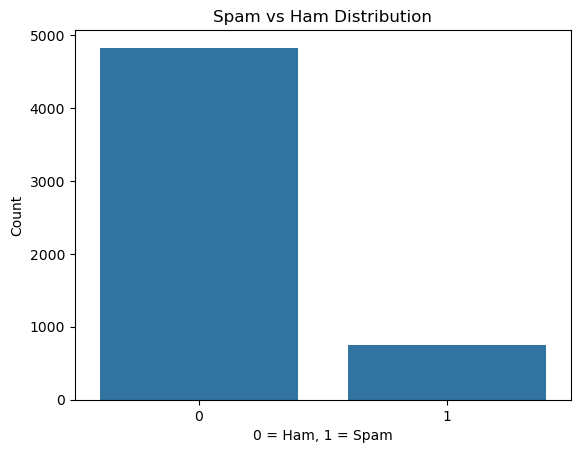

In [38]:
# EDA
sns.countplot(x='label', data=data)
plt.title("Spam vs Ham Distribution")
plt.xlabel("0 = Ham, 1 = Spam")
plt.ylabel("Count")
plt.show()


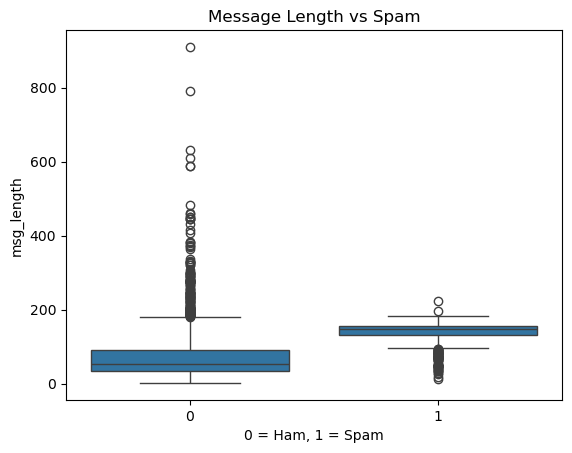

In [39]:
data['msg_length'] = data['message'].apply(len)

sns.boxplot(x='label', y='msg_length', data=data)
plt.title("Message Length vs Spam")
plt.xlabel("0 = Ham, 1 = Spam")
plt.show()


In [40]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text


In [41]:
data['clean_message'] = data['message'].apply(clean_text)


In [44]:
# TF-IDF
X = data['clean_message']
y = data['label']

tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X_tfidf = tfidf.fit_transform(X)


In [45]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [46]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.9713004484304932
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [47]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9632286995515695
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       0.99      0.73      0.84       149

    accuracy                           0.96      1115
   macro avg       0.98      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [48]:
svm = LinearSVC()
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9847533632286996
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.98      0.98      0.98      1115



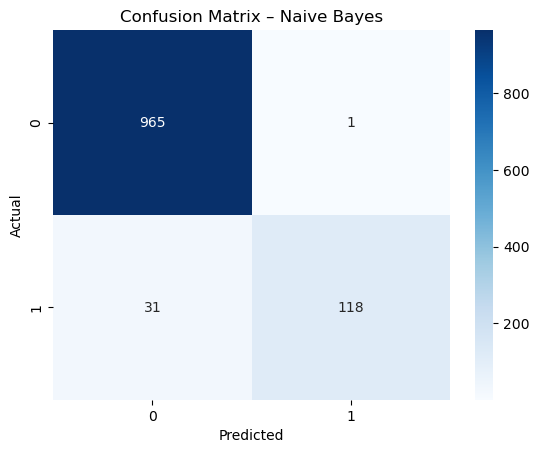

In [50]:
# Confusion Matrix (Naive Bayes)
cm = confusion_matrix(y_test, y_pred_nb)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Naive Bayes")
plt.show()


In [58]:
# Confusion Matrix (Logistic Regression model)
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)


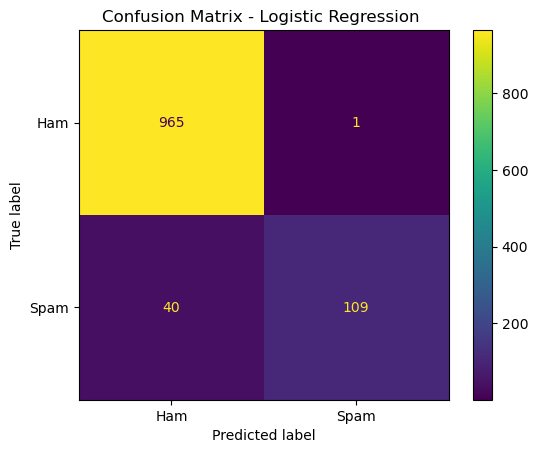

In [59]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    y_test,
    lr_pred,
    display_labels=['Ham', 'Spam']
)

plt.title("Confusion Matrix - Logistic Regression ")
plt.show()


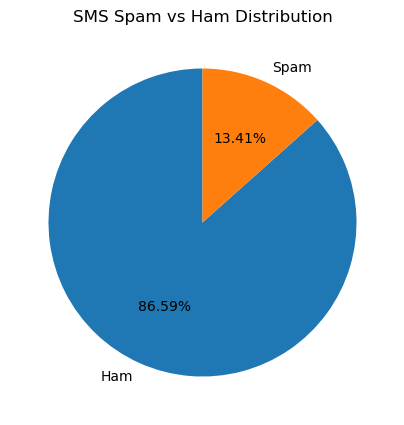

In [62]:
counts = data['label'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    counts,
    labels=['Ham', 'Spam'],
    autopct='%1.2f%%',
    startangle=90
)
plt.title("SMS Spam vs Ham Distribution")
plt.show()


In [ ]:
#CodSoft Internship Report
Task: SPAM SMS DETECTION

Intern Name: Mahendra Hanamant Bidarbhavikar
Internship Domain: Machine Learning
Organization: CodSoft
Task Title: SPAM SMS DETECTION
Programming Language: Python
Duration: 10 January 2026 - 10 February 2026

#Introduction
The objective of Task 4 was to build a machine learning model capable of classifying SMS messages as Spam or Ham (legitimate). Spam detection is an important application of Natural Language Processing (NLP) that helps in filtering unwanted messages and improving communication security.

#Dataset Description
The dataset used for this task consists of SMS messages labeled as either spam or ham. Each record contains the message text and its corresponding class label. The target variable represents whether the message is spam (1) or ham (0). The dataset shows class imbalance, with ham messages being more frequent than spam messages.

#Methodology
The preprocessing stage involved cleaning text data by converting it to lowercase, removing punctuation, numbers, and unnecessary spaces. Exploratory Data Analysis (EDA) was performed to analyze the distribution of spam and ham messages and message length patterns.
Text data was converted into numerical features using TF-IDF (Term Frequency–Inverse Document Frequency) vectorization. Three machine learning models were trained and evaluated:
* Naive Bayes
* Logistic Regression
* Support Vector Machine (SVM)

#Results and Evaluation
The models were evaluated using accuracy, precision, recall, F1-score, and confusion matrix. Naive Bayes performed efficiently due to its suitability for text classification tasks, while Logistic Regression and SVM also achieved strong results. Precision and recall were emphasized to ensure effective spam detection with minimal false positives.

#Conclusion
This project successfully demonstrated the use of NLP and machine learning techniques for spam SMS detection. Proper text preprocessing and TF-IDF feature extraction played a crucial role in achieving good model performance. The developed model can be effectively used to filter spam messages and improve user experience. This task provided hands-on experience in text classification and real-world NLP applications.

#Tools & Technologies Used
* Python 
* Pandas
* NumPy
* Matplotlib
* Seaborn
* Scikit-learn
* Jupyter Notebook